<a href="https://colab.research.google.com/github/Gajalakshmisubramani/thunder_and_light_detection_project-/blob/main/thunderstorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns

In [ ]:
#dataset in dataframe
col=["DateTime","Temperature","Pressure","Humitity","WindSpeed","windDirection","Precipitation","Visibility","CloudeCover","Thunderstorm","GaleForceWind"]
df=pd.read_csv("/content/metrologicalthunder.csv",names=col)
df.head()

,DateTime,Temperature,Pressure,Humitity,WindSpeed,windDirection,Precipitation,Visibility,CloudeCover,Thunderstorm,GaleForceWind
0,2202-12-31 11:00,17,967,45,12,E,1.345670,7,45,0,0
1,2023-01-01 0:00,28,983,34,38,W,0.135763,18,43,0,0
2,2023-01-01 1:00,18,993,2,19,E,3.058864,8,66,1,1
3,2023-01-01 2:00,4,982,6,32,E,1.379800,3,61,1,0
4,2023-01-01 3:00,32,1037,26,13,E,19.916047,6,11,1,0


In [ ]:
df['windDirection'] = df['windDirection'].map({'N': 0, 'E': 1, 'S': 2, 'W': 3})

In [ ]:
# Spliting the DataFrame based on the 'thunderstorm' and 'galeforce' column
thunderstorm= df[df['Thunderstorm'] == 1]
galeforcewind= df[df['GaleForceWind'] == 1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DateTime       3001 non-null   object 
 1   Temperature    3001 non-null   int64  
 2   Pressure       3001 non-null   int64  
 3   Humitity       3001 non-null   int64  
 4   WindSpeed      3001 non-null   int64  
 5   windDirection  3001 non-null   int64  
 6   Precipitation  3001 non-null   float64
 7   Visibility     3001 non-null   int64  
 8   CloudeCover    3001 non-null   int64  
 9   Thunderstorm   3001 non-null   int64  
 10  GaleForceWind  3001 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 258.0+ KB


In [ ]:
df.describe()

,Temperature,Pressure,Humitity,WindSpeed,windDirection,Precipitation,Visibility,CloudeCover,Thunderstorm,GaleForceWind
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,14.553815,1015.046984,49.851716,28.850383,1.507164,9.966636,9.639120,49.862046,0.513496,0.508830
std,14.331941,20.010417,28.863362,17.359703,1.121323,5.684835,5.848708,28.769781,0.499901,0.500005
min,-10.000000,967.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000
25%,2.000000,998.000000,25.000000,14.000000,0.000000,5.094410,5.000000,25.000000,0.000000,0.000000
50%,15.000000,1015.000000,50.000000,28.000000,2.000000,9.962593,10.000000,50.000000,1.000000,1.000000
75%,26.000000,1033.000000,75.000000,44.000000,3.000000,14.802988,15.000000,75.000000,1.000000,1.000000
max,39.000000,1049.000000,99.000000,59.000000,3.000000,19.993464,19.000000,99.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

DateTime         0
Temperature      0
Pressure         0
Humitity         0
WindSpeed        0
windDirection    0
Precipitation    0
Visibility       0
CloudeCover      0
Thunderstorm     0
GaleForceWind    0
dtype: int64

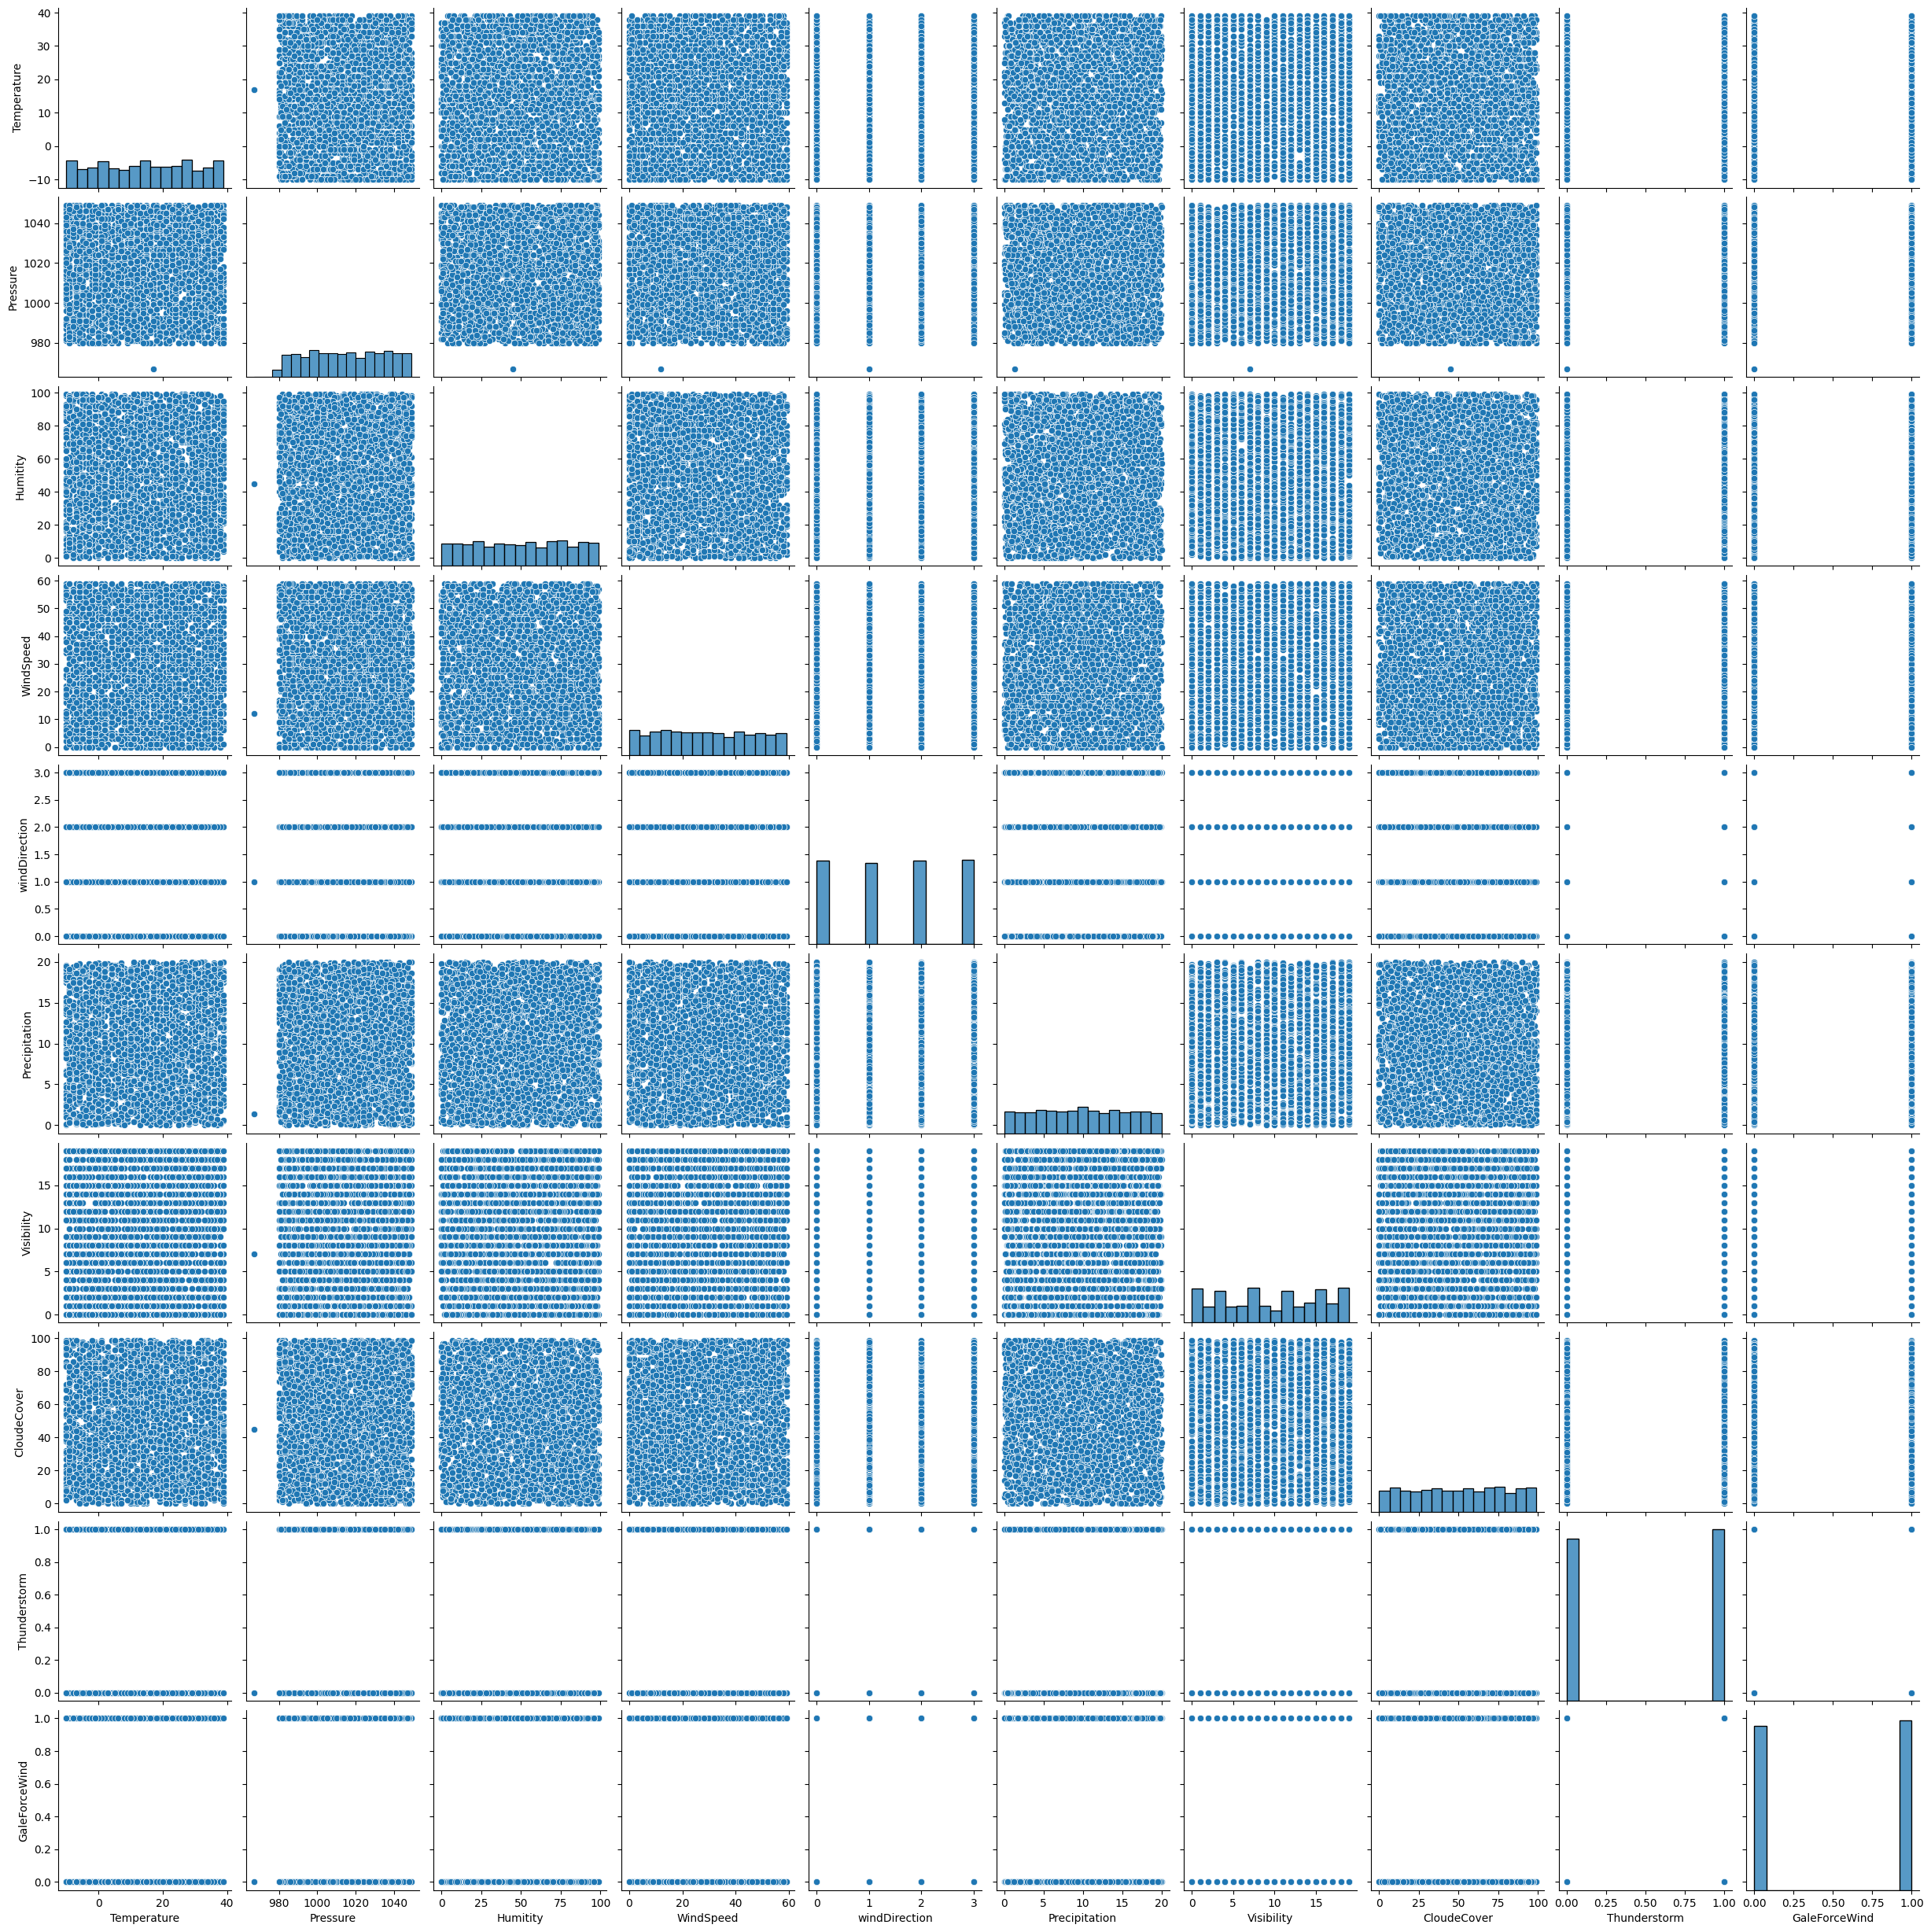

In [ ]:
sns.pairplot(df)

<ipython-input-13-82dbd14ece56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


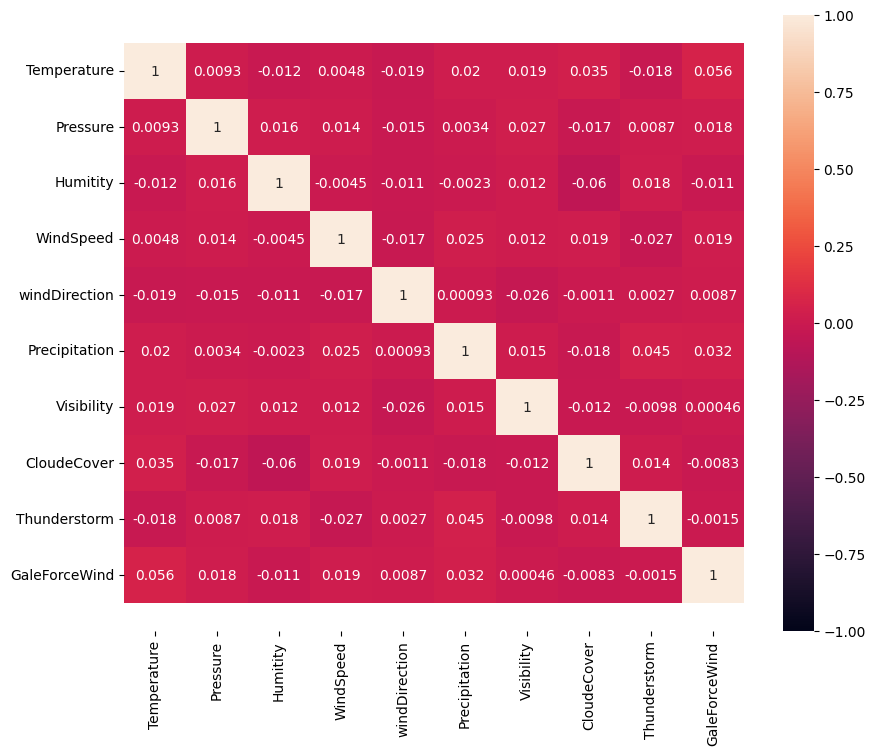

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
train1,valid1,test1=np.split(thunderstorm.sample(frac=1),[int(0.6*len(thunderstorm)),int(0.8*len(thunderstorm))])
train2,valid2,test2=np.split(galeforcewind.sample(frac=1),[int(0.6*len(galeforcewind)),int(0.8*len(galeforcewind))])


In [ ]:
# spliting of dependend and indepenend variable
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[1:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  return x,y


In [ ]:
x_train1,y_train1 =scale_dataset(train1)
x_vaild1,y_vaild1=scale_dataset(valid1)
x_test1,y_test1=scale_dataset(test1)

In [ ]:
x_train2,y_train2 =scale_dataset(train2)
x_vaild2,y_vaild2=scale_dataset(valid2)
x_test2,y_test2=scale_dataset(test2)

In [ ]:
lb_model=LogisticRegression()
lb_model=lb_model.fit(x_train1,y_train1)
y_pred=lb_model.predict(x_test1)
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.55      0.49       144
           1       0.51      0.41      0.46       165

    accuracy                           0.48       309
   macro avg       0.48      0.48      0.48       309
weighted avg       0.48      0.48      0.47       309



In [ ]:
rb_model=RandomForestClassifier()
rb_model=rb_model.fit(x_train1,y_train1)
y_pred=rb_model.predict(x_test1)
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.51      0.49       144
           1       0.53      0.47      0.50       165

    accuracy                           0.49       309
   macro avg       0.49      0.49      0.49       309
weighted avg       0.50      0.49      0.49       309



In [ ]:
ab_model=AdaBoostClassifier()
ab_model=ab_model.fit(x_train1,y_train1)
y_pred=ab_model.predict(x_test1)
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.44      0.43       144
           1       0.49      0.48      0.49       165

    accuracy                           0.46       309
   macro avg       0.46      0.46      0.46       309
weighted avg       0.46      0.46      0.46       309



In [ ]:
svm_model=SVC()
svm_model=svm_model.fit(x_train1,y_train1)
y_pred=svm_model.predict(x_test1)
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       144
           1       0.00      0.00      0.00       165

    accuracy                           0.47       309
   macro avg       0.23      0.50      0.32       309
weighted avg       0.22      0.47      0.30       309



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt_model=DecisionTreeClassifier()
dt_model=dt_model.fit(x_train1,y_train1)
y_pred=dt_model.predict(x_test1)
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.45      0.45       144
           1       0.51      0.50      0.51       165

    accuracy                           0.48       309
   macro avg       0.48      0.48      0.48       309
weighted avg       0.48      0.48      0.48       309



In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train1,y_train1)
y_pred=knn_model.predict(x_test1)
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.58      0.53       144
           1       0.57      0.47      0.51       165

    accuracy                           0.52       309
   macro avg       0.53      0.53      0.52       309
weighted avg       0.53      0.52      0.52       309



In [ ]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train1,y_train1)
y_pred=nb_model.predict(x_test1)
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.52      0.48       144
           1       0.51      0.43      0.47       165

    accuracy                           0.47       309
   macro avg       0.48      0.48      0.47       309
weighted avg       0.48      0.47      0.47       309



In [ ]:
def lucas_kanade_method(vdieo_path):
  cap=cv2.VideoCaputre(video_path)
  feature_params=dict(maxCorners=100,qualityLevel=0.3,minDistance=7,blockSize=7)
  lk_params=dict(winSize=(15,15),maxLevel=2,criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,0.03))
  color=np.random.randint(0,255,(100,3))
  ret,old_frame=cap.read()
  old_gray=cv2.cvtColor(old_frame,cv2.COLOR_BGR2GRAY)
  p0=cv2.goodFeaturesToTrack(old_gray,mask=None,**feature_params)
  mask=np.zeros_like(old_frame)
  while(1):
    ret,frame=cap.read()
    if not ret:
      break
    frame_gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    p1,st,err=cv2.calcOpticalFlowPyLK(old_gray,frame_gray,p0,None,**lk_params)
    good_new=p1[st==1]
    good_old=p0[st==1]
    for i,(new,old) in enumerate(zip(good_new,good_old)):
      a,b=new.ravel()
      c,d=old.ravel()
      mask=cv2.line(mask,(a,b),(c,d),color[i].tolist(),2)
      frame=cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
      img=cv2.add(frame,mask)
      cv2_imshow(img)
      k=cv2.waitKey(30)&0xff
      if k==27:
        break
    old_gray=frame_gray.copy()
    p0=good_new.reshape(-1,1)
  cap.release()
  cv2.destroyAllWindows()
  return img
